In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/train.csv')

# Main functions 

In [3]:
def get_img(idx):
    #return reshaped image
    grid_data = dataset.iloc[idx].as_matrix().reshape(28,28)
    return(grid_data)
def show_img(img):
    #shows image with plt
    plt.imshow(img,interpolation="none",cmap="gray")
    plt.show()
def predict(weights_train,weights_predict):
    #single prediction finding distance betwen two weights vectors
    diff  = weights_train - weights_predict
    norms = np.linalg.norm(diff, axis=1)
    return np.where(norms == min(norms))[0][0]
def get_mean():
    # find mean of the matrix
    mean_of_images = np.zeros((1,height*width))
    for i in training_set:
        mean_of_images = np.add(mean_of_images,i)
    mean_of_images = np.divide(mean_of_images,float(amount)).flatten()
    return mean_of_images
def show_from_eigen_parts(weights,principal_components,digit,normalised_digits):
    # show image based on its principal components
    img = 0
    for i in range(principal_components.shape[0]):
        img +=principal_components[i]*weights[digit][i]
    img+=mean_of_images
    img = img.reshape(height,width)
    show_img(img)

# Creating dataset
    amount = The amount of digits to be trained on 
    height,width = the dimension of a single digit icon 
    labels = labels of the digits(0 to 9)
    

In [4]:
amount = 400
height = 28
width = 28
labels = df['label']
training_set= np.ndarray(shape=(amount, height*width), dtype=np.float64)
for g in range(amount):
        current = df.drop('label',axis=1).iloc[g].as_matrix()
        training_set[g,:] = np.array(current,dtype='float64').flatten()

/Users/kolakolasic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


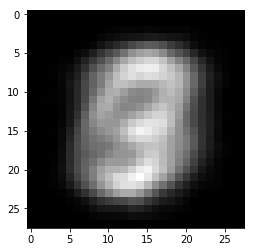

In [5]:
#getting the mean of our digit matrix
mean_of_images = get_mean()
show_img(mean_of_images.reshape(height, width))

## Normalizing digits
    going through all our images and subracting mean to set our matrix at the 0 coordinates

In [6]:
normalised_digits = np.ndarray(shape=(amount, height*width))
for i in range(amount):
    normalised_digits[i] = np.subtract(training_set[i],mean_of_images)

## normilized digits 


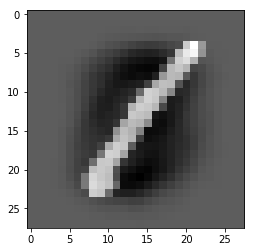

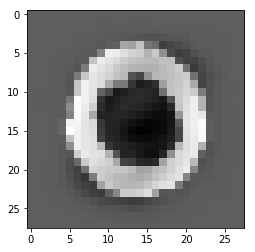

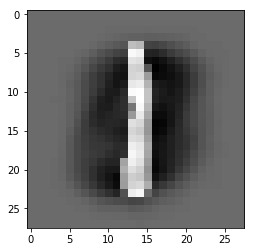

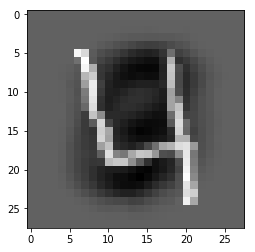

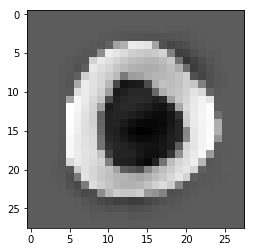

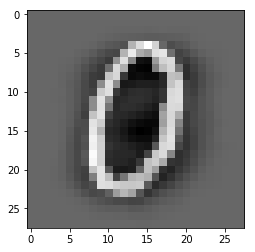

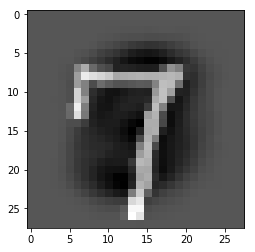

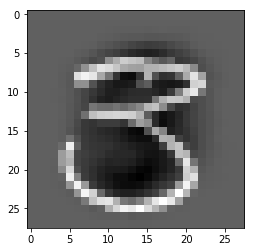

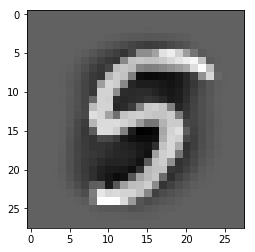

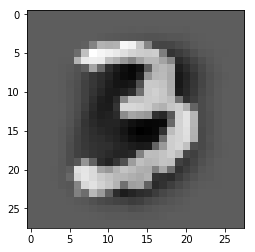

In [7]:
amount_to_show = 10
for i in range(amount_to_show):
    img = normalised_digits[i].reshape(height,width)
    show_img(img)

### Covariance matrix

In [8]:
cov_matrix = np.cov(normalised_digits)

# calculating eigenvalues, eigenvectors

In [9]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

In [10]:
#sorting to get the most relevant
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print(eigvectors_sort)
print(eigvalues_sort)

[array([ 0.02574762, -0.16117102,  0.04512636, -0.00776177, -0.1788672 ,
       -0.03428681,  0.05028282,  0.00576395,  0.00461475, -0.03928882,
        0.04678904,  0.06463535,  0.04937174,  0.0011813 , -0.0519933 ,
        0.04090988,  0.00307173, -0.06001345,  0.04391794, -0.08000413,
        0.0368818 , -0.01389714, -0.03680439, -0.12158822,  0.00147422,
       -0.04191059,  0.02511906,  0.06644536,  0.09036679,  0.02760616,
        0.04579646,  0.01524014, -0.00815869,  0.06338814,  0.03755262,
        0.02196571,  0.02201357,  0.0325942 ,  0.03628997,  0.04527475,
        0.0104757 ,  0.04421009, -0.01696245,  0.00906122,  0.0302407 ,
        0.00799333,  0.00458037,  0.04397198,  0.03854325,  0.0293301 ,
        0.0238916 , -0.08604526,  0.03876606,  0.01433033, -0.13316294,
        0.02594127,  0.02061298, -0.01169205,  0.07563497,  0.03876705,
        0.01663274,  0.03031744,  0.00963016, -0.06281725, -0.02960964,
        0.008527  ,  0.01565901,  0.00545158,  0.03935129, -0.0

# Plot of the corelation of the amount of component left / to the variance achieved

Cumulative proportion of variance explained vector: 



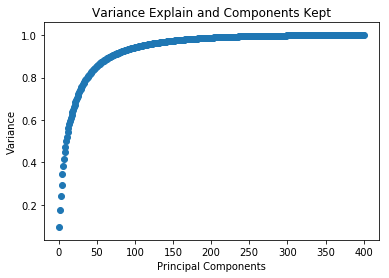

In [11]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)
print("Cumulative proportion of variance explained vector: \n" )
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.scatter(num_comp, var_comp_sum)
plt.show()

# building principal components
    we should chose amunt_of_components based on the corelation of  
    variance to the amount of principal component

In [12]:
amunt_of_components = 300
reduced_data = np.array(eigvectors_sort[:amunt_of_components]).transpose()
principal_components = np.dot(training_set.transpose(),reduced_data)
principal_components = principal_components.transpose()

# Weights of the training set
Calculating the amount of each principal component scalar for particular digit

In [13]:
weights = np.array([np.dot(principal_components,i) for i in normalised_digits])


# this part does not work yet, don`t touch it :)

# show_from_eigen_parts(weights,principal_components,1,normalised_digits)

## Predicting and calculating score
    Calculating score on new data
    firstly we get weights for our unkown digit
    and then find the distance from all our regular weights
    and then get the smallest one to predict
    approximal score +-85%

In [14]:
def predict_all(df, digits= 300):
    correct = 0
    start=amount+digits
    for i in range(amount,start):
        current = df
        current = current.drop('label',axis=1)
        unknown_digit = current.iloc[i].as_matrix().reshape(28,28)
        unknown_digit_vector = np.array(unknown_digit, dtype='float64').flatten()
        unknown_digit_vector = np.subtract(unknown_digit_vector,mean_of_images)
        weights_unknown = np.dot(principal_components, unknown_digit_vector)
        res= predict(weights,weights_unknown)
        if(labels[res] == labels[i]):
            correct+=1
    return (correct*100)/(digits)

digits_amount = 300
print("Score is {}% with dataset trained on {} digits and prediction on {} digits ".format(predict_all(df,digits_amount),amount,digits_amount))
      
      
      

/Users/kolakolasic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


Score is 77.33333333333333% with dataset trained on 400 digits and prediction on 300 digits 
